In [7]:
import sys
print(sys.executable)
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

D:\software\anaconda\anzhuang\envs\clu0408\python.exe


In [8]:
#Cell fraction predicted by DeSide
my_datasets ={}
t_sne_datasets = {}
ori_datasets ={}
beter_pre = 'COAD\CESC\BLCA\LIHC\HNSC\KIRP\KICH\LUAD\LUSC\READ'
# beter_pre = 'COAD\CESC\BLCA\LIHC\HNSC\KIRP\KICH\LUAD\LUSC\READ\BRCA\GBM'    #BRCA\GBM 这两个是按CCC筛选的  20230323
beter_pre_list = beter_pre.split('\\')
new_deside_data_path = r'.\fig2\TCGA_all_predicted_cell_fraction_by_DeSide_20230216_009_0_0.csv'   #2023新数据                                        
new_deside_data = pd.read_csv(new_deside_data_path,index_col=0)
# new_deside_data.index = new_deside_data.index.str.rsplit('-',1).str[0]    # 改变index 如 TCGA-C4-A0F1-01A 变成 TCGA-C4-A0F1    
# new_deside_data  = new_deside_data.loc[:,['cancer_type','B Cells','CD4 T','CD8 T','Endothelial Cells','Fibroblasts','Macrophages']]
new_deside_data  = new_deside_data.loc[:,['cancer_type','Cancer Cells']]

for i in beter_pre_list:
    cf_new = new_deside_data.loc[new_deside_data['cancer_type']==i,:]
    if i=='COAD':
        cf_new_all = cf_new
    else:
        cf_new_all = pd.concat([cf_new_all,cf_new],join='inner',axis=0)


print(i,'----------------')
print('The number of duplicated samples: ',cf_new_all.index.duplicated().sum())
print('Duplicated samples id: ',cf_new_all.index[cf_new_all.index.duplicated(keep='first') ])
print('Number of samples before deletion: ',len(cf_new_all))
cf_new_all = cf_new_all[~cf_new_all.index.duplicated(keep='first')]    #delete duplicated samples 
print('Number of samples after deletion: ',len(cf_new_all))


READ ----------------
The number of duplicated samples:  0
Duplicated samples id:  Index([], dtype='object', name='sample_id')
Number of samples before deletion:  3597
Number of samples after deletion:  3597


In [9]:
CPE_path = r'.\fig2\cancer_purity.csv'
cpe = pd.read_csv(CPE_path,index_col=0)
cpe = cpe[['CPE']]

cf_cpe = pd.concat([cf_new_all,cpe],join='inner',axis=1)#3586
cf_cpe = cf_cpe.drop('cancer_type',axis=1,inplace=False)  #3586个
cf_cpe = cf_cpe.dropna(how='any')  #3575个   删除缺失值
# cf_cpe.isnull().any(axis=1)  #行查看缺失值
# cf_cpe.isnull().any(axis=1).sum()  ##统计共有几行存在缺失值
cf_cpe

,Cancer Cells,CPE
TCGA-4T-AA8H-01A,0.984,0.8917
TCGA-AA-A00Q-01A,0.895,0.7034
TCGA-AZ-4614-01A,0.978,0.9149
TCGA-A6-2675-01A,0.673,0.6193
TCGA-AA-A00U-01A,0.940,0.8835
...,...,...
TCGA-AF-3913-01A,0.872,0.8486
TCGA-AH-6643-01A,0.903,0.8053
TCGA-AG-4007-01A,0.803,0.7707
TCGA-AH-6544-01A,0.988,0.8927


In [10]:
#https://blog.csdn.net/longwei92/article/details/82899604
#cf_cpe分组
listBins = [0, 0.1, 0.2,0.25, 0.3,0.35, 0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]

listLabels=[0.05,
 0.15,
 0.225,
 0.275,
 0.325,
 0.375,
 0.425,
 0.475,
 0.525,
 0.575,
 0.625,
 0.675,
 0.725,
 0.775,
 0.825,
 0.875,
 0.925,
 0.975]
cf_cpe['class'] = pd.cut(cf_cpe['Cancer Cells'], bins=listBins, labels=listLabels, include_lowest=True)
cf_cpe['class'].unique()
cf_cpe_box = cf_cpe.drop('Cancer Cells',axis=1,inplace=False)
cf_cpe_box['class'] =cf_cpe_box['class'].astype(float)

In [11]:
#得到filtered_data
df = pd.DataFrame()
for i in listLabels:
    k= pd.DataFrame(cf_cpe.loc[cf_cpe['class']==i,'CPE'].reset_index(drop=True))
    k.rename(columns = {"CPE": i},  inplace=True)
    if i == 0.05:
        df = k
    else:
        df = pd.concat([df,k],axis=1)

mask = ~np.isnan(df)
filtered_data = [df[d][mask[m]] for d, m in zip(df, mask)]
filtered_data

[0    0.3640
 1    0.3276
 2    0.4118
 3    0.3703
 4    0.1477
 5    0.1926
 Name: 0.05, dtype: float64,
 0     0.5077
 1     0.2093
 2     0.5367
 3     0.2098
 4     0.5651
 5     0.2232
 6     0.4644
 7     0.6836
 8     0.2080
 9     0.2601
 10    0.4083
 11    0.3401
 12    0.4704
 13    0.5186
 14    0.3802
 15    0.4400
 16    0.3382
 17    0.5016
 18    0.5144
 19    0.5505
 20    0.3431
 21    0.4181
 22    0.5632
 Name: 0.15, dtype: float64,
 0     0.2605
 1     0.6169
 2     0.3047
 3     0.4223
 4     0.6839
 5     0.3605
 6     0.5271
 7     0.3034
 8     0.3896
 9     0.5679
 10    0.4862
 11    0.2992
 12    0.4164
 13    0.6597
 14    0.5509
 15    0.4095
 16    0.3242
 17    0.4474
 18    0.3431
 19    0.4192
 20    0.3589
 Name: 0.225, dtype: float64,
 0     0.6289
 1     0.3835
 2     0.4812
 3     0.4229
 4     0.3228
 5     0.3964
 6     0.3551
 7     0.5196
 8     0.4150
 9     0.5635
 10    0.2738
 11    0.5534
 12    0.6130
 13    0.3888
 14    0.5316
 15    0

In [14]:
from matplotlib.pylab import mpl
def set_fig_style(font_family=None, font_size=None):
    # set_fig_style(font_family='Arial', font_size=8)
    fig, ax = plt.subplots()
    
    try:
        sns.set_style("white")
        plt.style.use(['science','no-latex'])
    except:
        print('No science style')      
        sns.set(palette='muted', font_scale=1.5)
        
    mpl.rcParams['figure.dpi'] = 300
    mpl.rcParams['figure.facecolor'] = 'white'
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.rcParams['svg.fonttype'] = 'none'
    if font_family:
        mpl.rcParams['font.family'] = font_family
    if font_size:
        mpl.rcParams['font.size'] = font_size  
    # print('figure.dpi will be set to', mpl.rcParams['figure.dpi'])
    plt.close('all')

def make_path(path):
    if not os.path.exists(path):
        os.makedirs(path)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_31616\1036773852.py:76: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(data1),widths=width,positions=position,showmeans=False, showmedians=False,


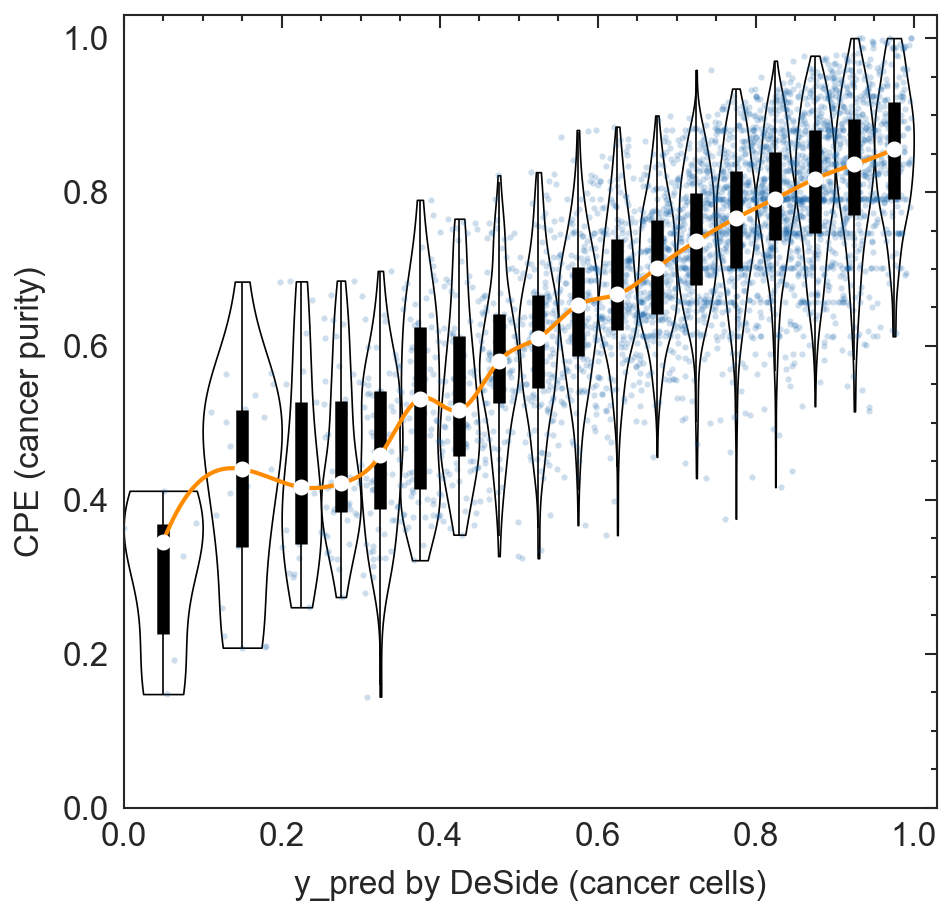

In [15]:
#Violin plot
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pylab import mpl
# import scienceplots    #版本不一样 有些不需要import

from scipy.interpolate import make_interp_spline


def smooth_xy(lx, ly):
    """Smooth processing data

    :param lx: data of X-axis
    :param ly: data of Y-axis
    :return: data after smooth [slx, sly]
    """
    x = np.array(lx)
    y = np.array(ly)
    x_smooth = np.linspace(x.min(), x.max(), 300)    #300 can be changed
    y_smooth = make_interp_spline(x, y)(x_smooth)
    return [x_smooth, y_smooth]

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, listBins):
#     ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)   #改
    ax.set_xticks(ticks=listBins,labels=listBins) 

    ax.set_xlim(0, 1.03)    #改   ax.set_xlim(listBins[0]-0.05, listBins[-1]+0.05)  
    ax.set_ylim(0,1.03)






data1 = [sorted(i) for i in filtered_data]
data = [sorted(a) for i,a in df.items()]

#####figstyle
sns.set_style("white")
plt.style.use(['science','no-latex'])
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42    #42
plt.rcParams['svg.fonttype'] = 'none'

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 8




#####

set_fig_style(font_family='Arial', font_size=8)
fig,  ax2= plt.subplots(figsize=(3.5, 3.5))   #7,4
position = (0.05,  0.15, 0.225, 0.275, 0.325, 0.375, 0.425, 0.475, 0.525,0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875, 0.925, 0.975)
width=    (0.1,   0.1,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05, 0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05)

ax2.set_title('')

ax2.set_ylabel('CPE (cancer purity)')   #,fontsize=18
ax2.set_xlabel('y_pred by DeSide (cancer cells)')  #,fontsize=18


parts = ax2.violinplot(
        np.array(data1),widths=width,positions=position,showmeans=False, showmedians=False,
        showextrema=False)  #,bw_method=10
for pc in parts['bodies']:
    pc.set_facecolor('white')  ##D43F3A  white   darkorange
    pc.set_alpha(1)
    pc.set_edgecolor('black')  #color=' coral '   darkorange
    pc.set_alpha(1)
    pc.set_linewidth(0.4)      #pc.set_linewidth(0.8)


quartile1, medians, quartile3 =np.nanpercentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = position
ax2.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3)  #color='k'
ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=0.4)  #color='k'
plt.scatter(x=cf_cpe['Cancer Cells'],y=cf_cpe['CPE'],marker = '.',s=1,alpha=0.2,rasterized=True)   #,color='gray'   #s=10
xy_s = smooth_xy(df.median().index, df.median().values)
plt.plot(xy_s[0],xy_s[1],color='darkorange',linewidth=1)  #1.8
# plt.plot(df.median().index,df.median().values)

#####Calculate 95% confidence intervals of data
#https://blog.csdn.net/with_still_water/article/details/102511633


lower_interval_list =[]
upper_interval_list =[]
interval_a=[]   #interval: The median values in the figures in the appendix
interval_b=[]   #interval: The 95% confidence intervals of the figures in the appendix
for i in filtered_data:
    split_data = np.array(i)

    ##
    mean, scale = np.mean(split_data), np.std(split_data)
    #t分布
#     mean, scale = np.mean(split_data), stats.sem(split_data)
#     conf_int = stats.norm.interval(0.95, loc=mean,scale=scale)
    alpha = 0.95
#     df_ = len(filtered_data) - 1
#     conf_int = stats.t.interval(alpha, df_, loc=mean, scale=scale)
    conf_int = stats.norm.interval(alpha, loc=mean, scale=scale)
    lower_interval = conf_int[0]
    upper_interval = conf_int[1]
    lower_interval_list.append(lower_interval)
    upper_interval_list.append(upper_interval)
    #data of supporting information
    A,B = conf_int[0],conf_int[1]
    a = A+(B-A)/2
    b = (B-A)/2
    interval_a.append(a)
    interval_b.append(b)
    
# xy_s = smooth_xy(df.median().index, lower_interval_list)
# plt.plot(xy_s[0],xy_s[1],color='steelblue',linewidth=1) 
# xy_s = smooth_xy(df.median().index, upper_interval_list)
# plt.plot(xy_s[0],xy_s[1],color='steelblue',linewidth=1) 
#####置信区间>
# set style for the axes
listBins1= [0.0,0.2,0.4,0.6,0.8,1.0]

for ax in [ax2]:
    set_axis_style(ax, listBins1)

make_path(r'.\fig2\violin_plot')
plt.savefig(r'.\fig2\x_vs_y_final_model.svg',dpi=300)